<a href="https://colab.research.google.com/github/AngelFA04/curso_estadistica_aplicada_py/blob/master/S22_Regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

Los modelos de regresión loineal tienen como variable de respuesta ($Y$) una variable cuantitativa.

¿Qué pasa si la variable de respuesta fuera cualitativa?

Por ejemplo, una variable de variable cualitativa o de naturaleza Bernoulli sería una que indique si una persona compra o no un producto.

$X = 0:$ No comprador, $X = 1:$ Comprador
Ahora la regresión lineal no se puede aplicar porque al estimar los valores de 0 o 1 incurriríamos en valores menos a 0 y mayores que 1.
Por esto es que se transforma la variable de salida con el operador logístico, el cual acotara el resultadoa a 0 o a 1, a traves de la siguiente fórmula: 
$$ Prob_L = \frac{1}{1+e^{-(\beta_0+\beta_1x_{1,i}+...+\beta_kx_{k,i})}} $$

$$ {\displaystyle g(h)={\frac {1}{1+e^{-2\beta h}}},} $$ 

La función logística transforma la variable $Y$ númerica en una probabilidad [0,1] valiéndose de la misma estructura que la regresión lineal.

## Referencias
- https://en.wikipedia.org/wiki/Logistic_function
- https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

---

In [7]:
!pip install pyreadstat

     |████████████████████████████████| 2.0MB 2.7MB/s 


In [4]:
!wget https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-21-regresion-logistica/compensacion-ejecutivos.sav

--2020-09-01 16:33:54--  https://static.platzi.com/media/tmp/class-files/git/fundamentos-estadistica-analisis-de-datos-python/fundamentos-estadistica-analisis-de-datos-python-21-regresion-logistica/compensacion-ejecutivos.sav
Resolving static.platzi.com (static.platzi.com)... 104.20.18.218, 172.67.19.213, 104.20.19.218, ...
Connecting to static.platzi.com (static.platzi.com)|104.20.18.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3121 (3.0K) [application/octet-stream]
Saving to: ‘compensacion-ejecutivos.sav’

compensacion-ejecut 100%[===================>]   3.05K  --.-KB/s    in 0.006s  

2020-09-01 16:33:54 (483 KB/s) - ‘compensacion-ejecutivos.sav’ saved [3121/3121]



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import metrics

%matplotlib inline

In [9]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


In [10]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [11]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

Ahora se van a identificar las variables que más influyen para que una persona gane un salario superior a 96000 UM.

In [22]:
y = np.where(df['salario'] > 96000, 1, 0)
X = df.drop('salario', axis=1)

[Text(0, 0.5, 'y'), Text(0.5, 0, 'Salario')]

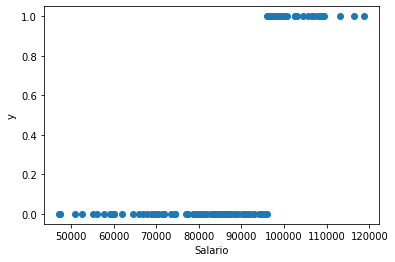

In [23]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set(xlabel='Salario', ylabel='y')

A continuación se genera la regresión logistica

In [28]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)
# Con la función predict_proba da la probabilidad
y_estimado = reg_log.predict_proba(X)
y_estimado_1 = reg_log.predict_proba(X)[:,1]
# En cambio con predict generá la clasificación como un 0 o un 1 directamente
y_clasificado = reg_log.predict(X)

In [29]:
y_clasificado

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [30]:
#y_estimado_1

In [31]:
#y_estimado

Ahora con el vector de `y_clasificado` se puede hacer una comparación con la variable `y` original para así determinar la precisión del modelo. Para esto se usará la función de `accuracy_score` de la libreria de metricas de sickitlearn.

In [35]:
accuracy_score(y, reg_log.predict(X)) 
# Lo anterior equivalente a 
accuracy_score(y, y_clasificado)

0.9090909090909091